In [97]:
install.packages("NMF")


The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmpDe8Ofi/downloaded_packages


In [98]:
library(CellChat)
library(Seurat)
library(NMF)
library(ggalluvial)

In [99]:
seurat_obj <- readRDS("../clustering/out/integrated_seurat_clusters_0.2.rds")

In [100]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,diagnosis,age,sex,tissue_location,RNA_snn_res.0.1,seurat_clusters,pANN_1,...,RNA_snn_res.0.05,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,RNA_snn_res.0.6,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.9,RNA_snn_res.0.99
,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<fct>,<dbl>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT,SCPCS000002,37293,6072,Glioblastoma,7,F,Right thalamus,3,5,0.4285714,...,3,4,4,5,4,4,5,7,6,5
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG,SCPCS000002,36546,5588,Glioblastoma,7,F,Right thalamus,2,3,0.2857143,...,2,2,2,2,3,2,1,2,2,3
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG,SCPCS000002,38553,5642,Glioblastoma,7,F,Right thalamus,2,3,0.3809524,...,2,2,2,2,3,2,1,2,2,3
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT,SCPCS000002,38019,6575,Glioblastoma,7,F,Right thalamus,3,5,0.5714286,...,3,4,4,5,4,4,5,7,6,5
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC,SCPCS000002,42958,6942,Glioblastoma,7,F,Right thalamus,7,26,0.3333333,...,6,10,13,15,17,19,19,19,19,26
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC,SCPCS000002,38022,7026,Glioblastoma,7,F,Right thalamus,0,16,0.2857143,...,0,1,0,14,15,17,16,16,16,16


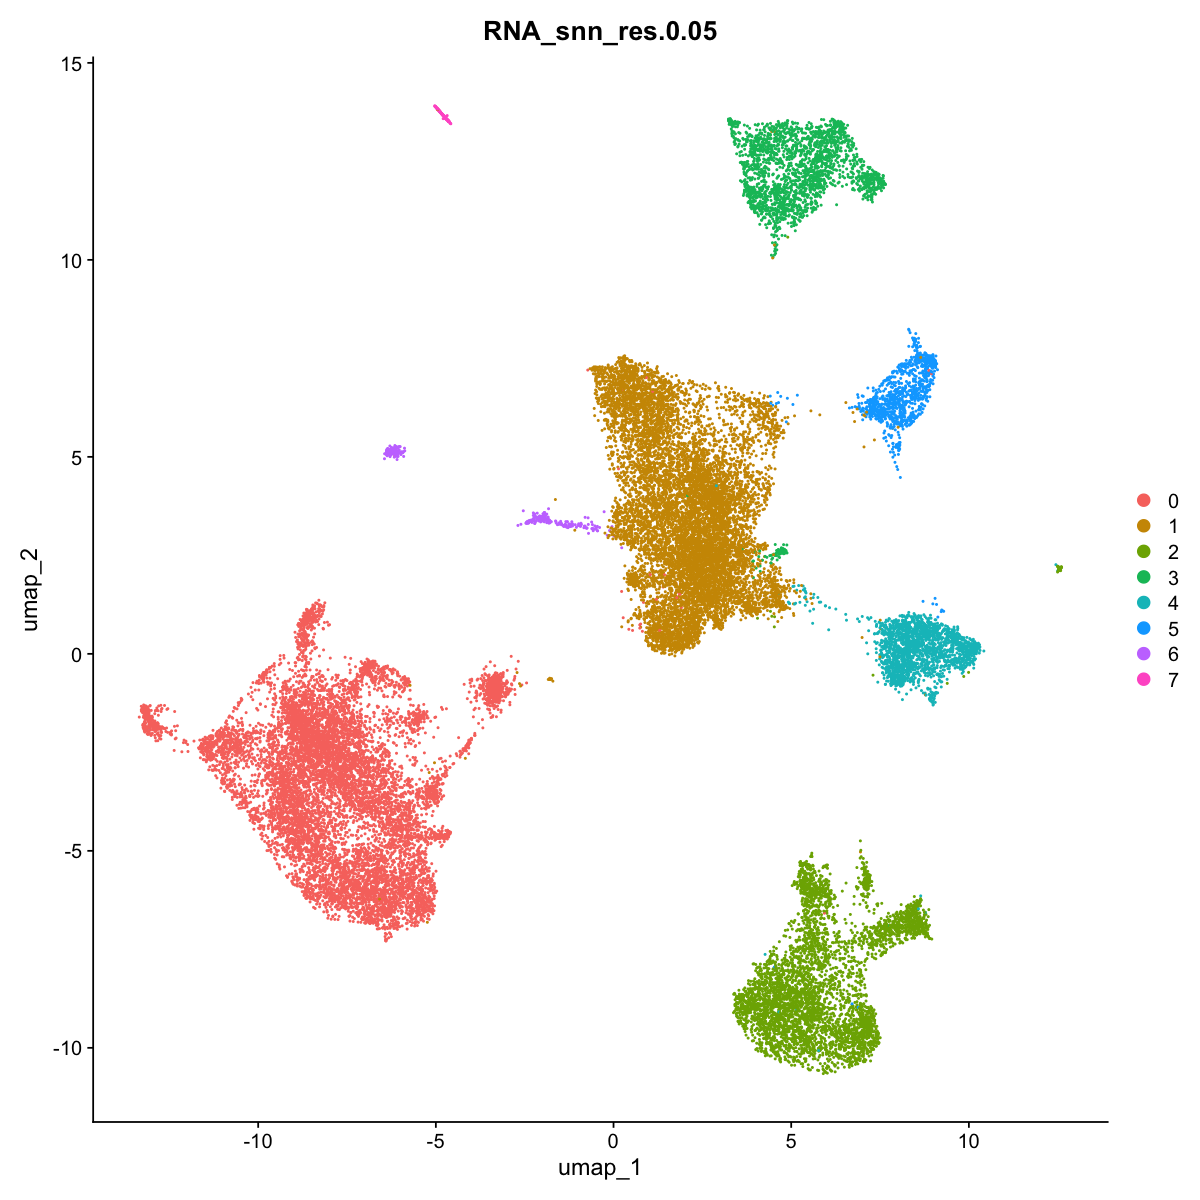

In [101]:
DimPlot(seurat_obj, group.by="RNA_snn_res.0.05")

In [102]:
seurat_obj@meta.data$label <- paste0("C", seurat_obj@meta.data$RNA_snn_res.0.05)
meta <- seurat_obj@meta.data
meta$samples <- as.factor(meta$orig.ident)

In [103]:
cellchat <- createCellChat(object=seurat_obj, meta=meta, group.by="label")
cellchat <- addMeta(cellchat, meta=meta)
cellchat <- setIdent(cellchat, ident.use="label")
groupSize <- as.numeric(table(cellchat@idents))

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  C0, C1, C2, C3, C4, C5, C6, C7 


In [104]:
CellChatDB <- CellChatDB.human
CellChatDB.use <- subsetDB(CellChatDB, search="Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

The number of highly variable ligand-receptor pairs used for signaling inference is 965 


In [105]:
cellchat <- computeCommunProb(cellchat)
cellchat <- filterCommunication(cellchat, min.cells = 10)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-02-16 21:25:40.817519]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-02-16 21:28:23.689488]"


In [106]:
df.net <- subsetCommunication(cellchat)

In [107]:
slot.name = "netP"
df.net <- subsetCommunication(cellchat, sources.use=c(0,1), targets.use=c(16))

In [108]:
cellchat <- computeCommunProbPathway(cellchat)

In [109]:
cellchat <- aggregateNet(cellchat)

In [110]:
mat <- cellchat@net$weight

In [111]:
pathway_list <- cellchat@netP$pathways
pathway_list

[1] "PTN"        "MIF"        "SPP1"       "CypA"       "MK"        
 [6] "COMPLEMENT" "GALECTIN"   "PDGF"       "NRG"        "GRN"       
[11] "PTPR"       "PARs"       "TGFb"       "BMP"        "ANNEXIN"   
[16] "SLIT"       "GAS"        "BAFF"       "WNT"        "GDF"       
[21] "ncWNT"

Do heatmap based on a single object 




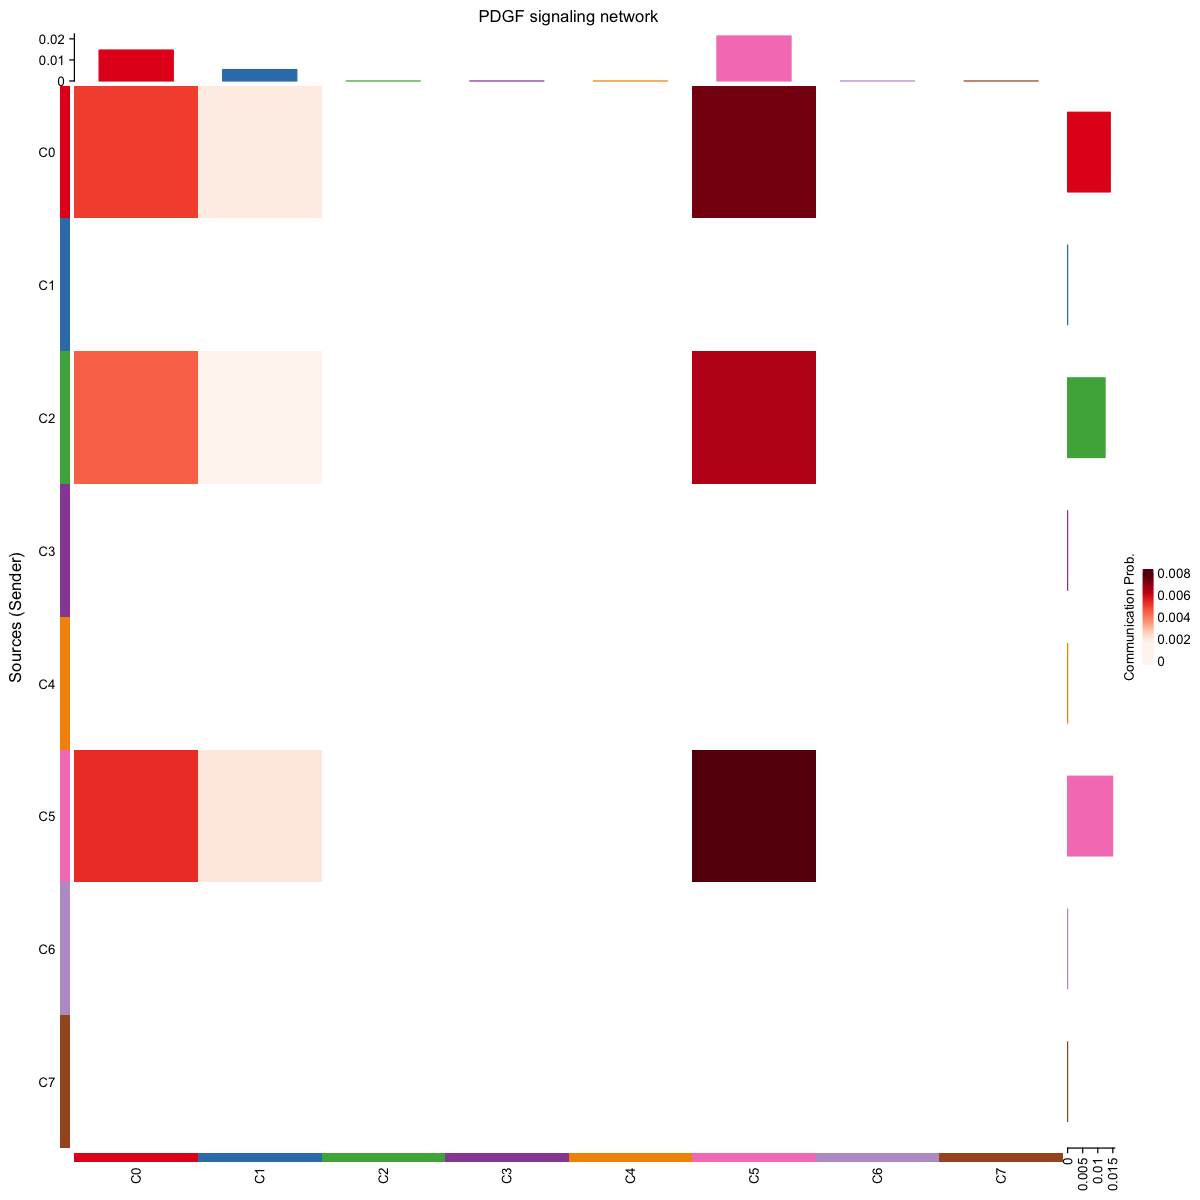

In [112]:
pathways.show <- c("PDGF")
netVisual_heatmap(cellchat, signaling=pathways.show)

In [113]:

cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

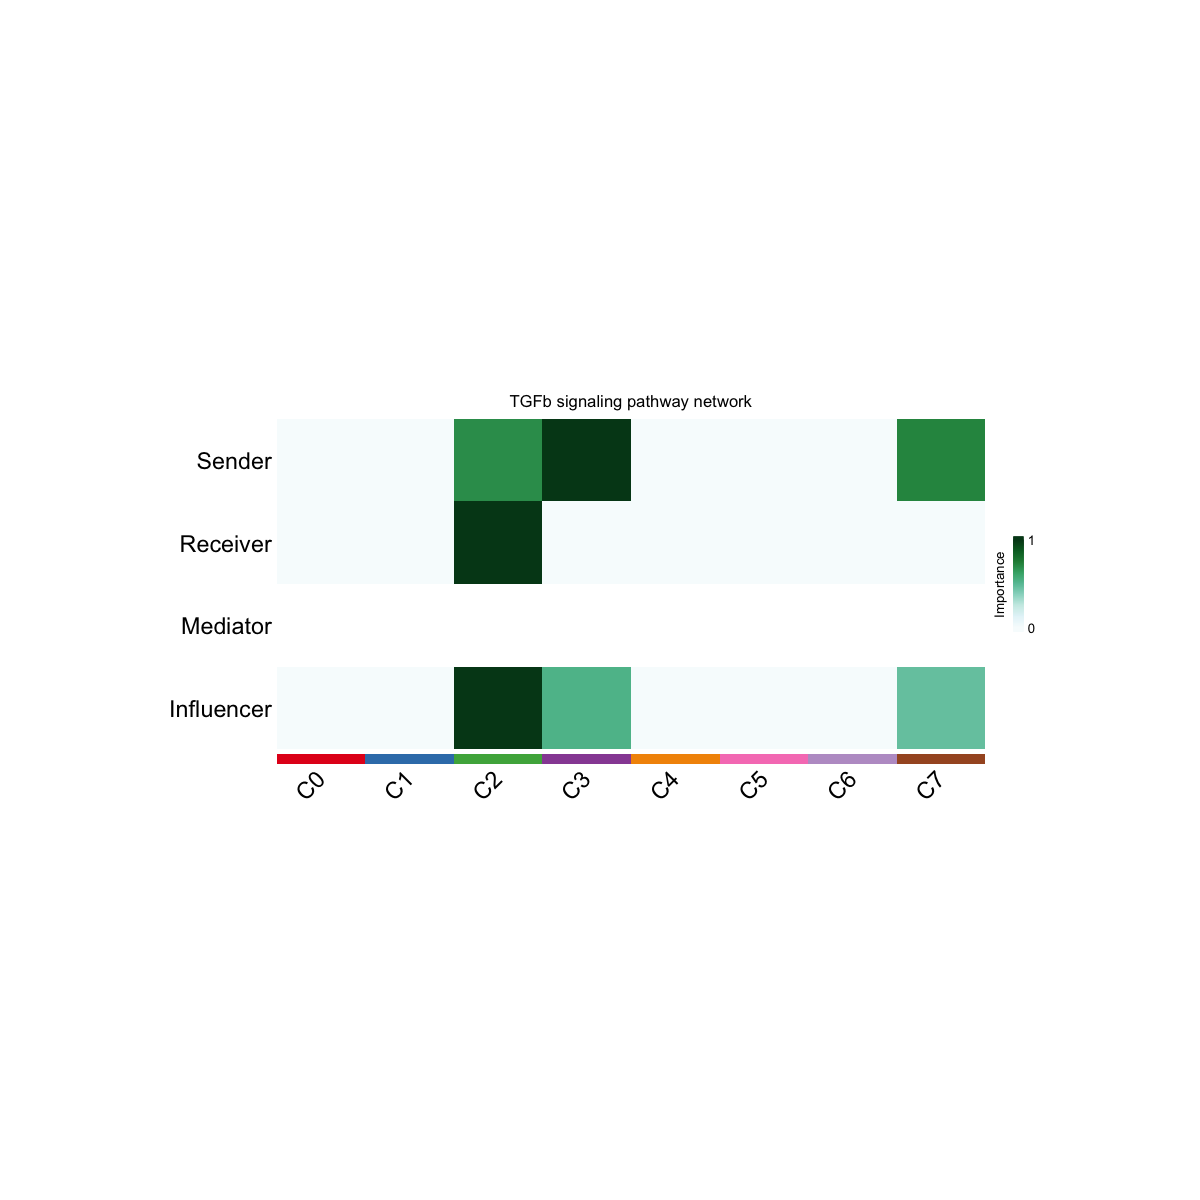

In [114]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("TGFb"),
  width = 15,
  height = 7,
  font.size = 14
)

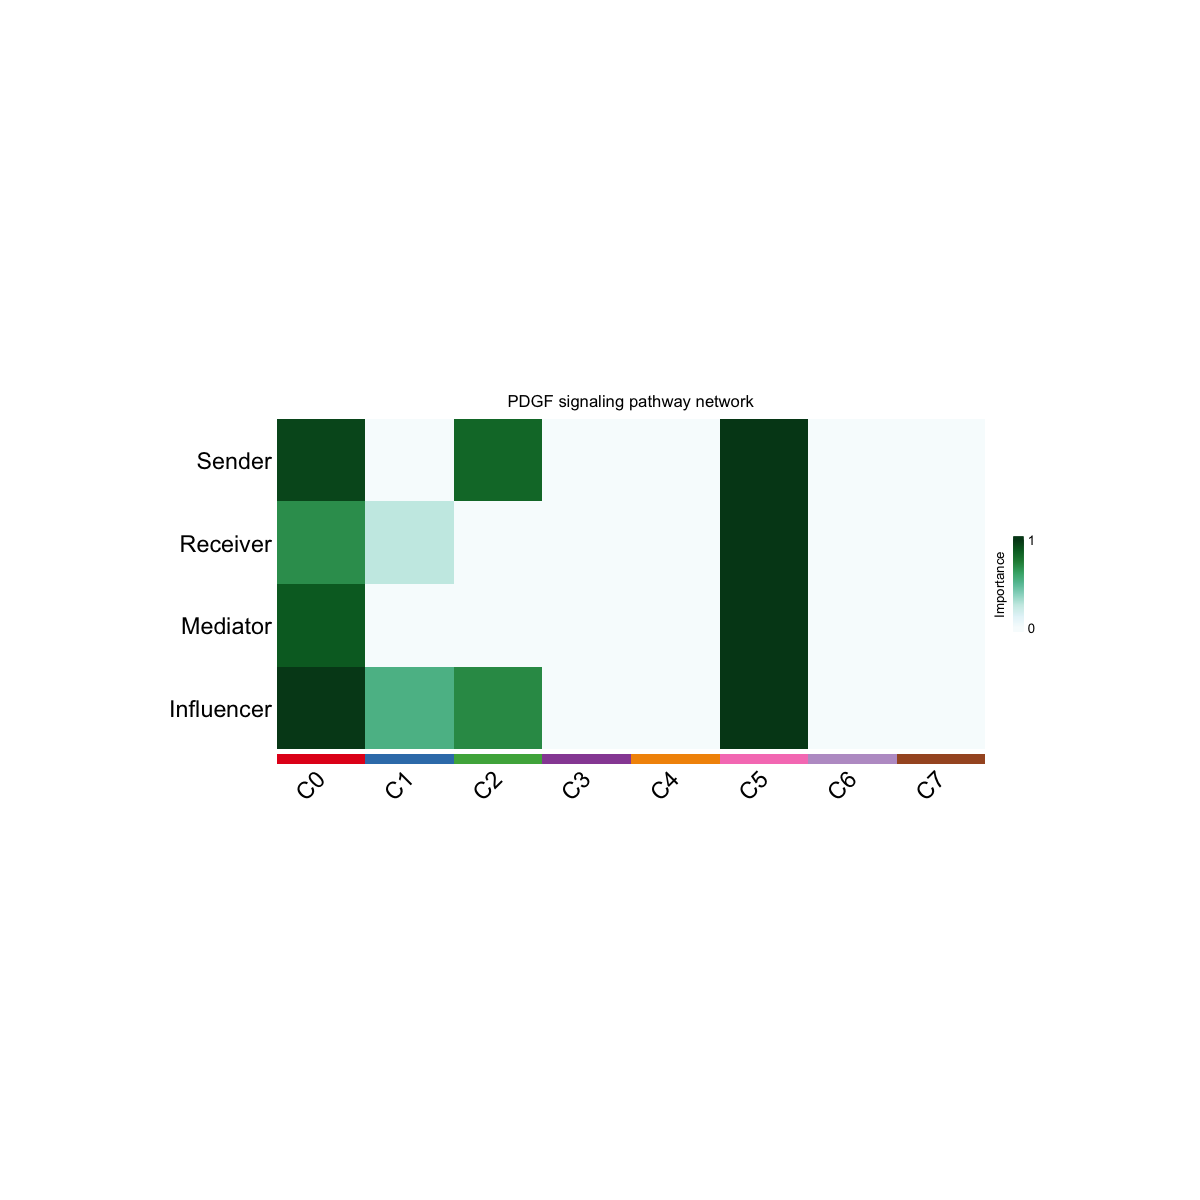

In [115]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("PDGF"),
  width = 15,
  height = 7,
  font.size = 14
)

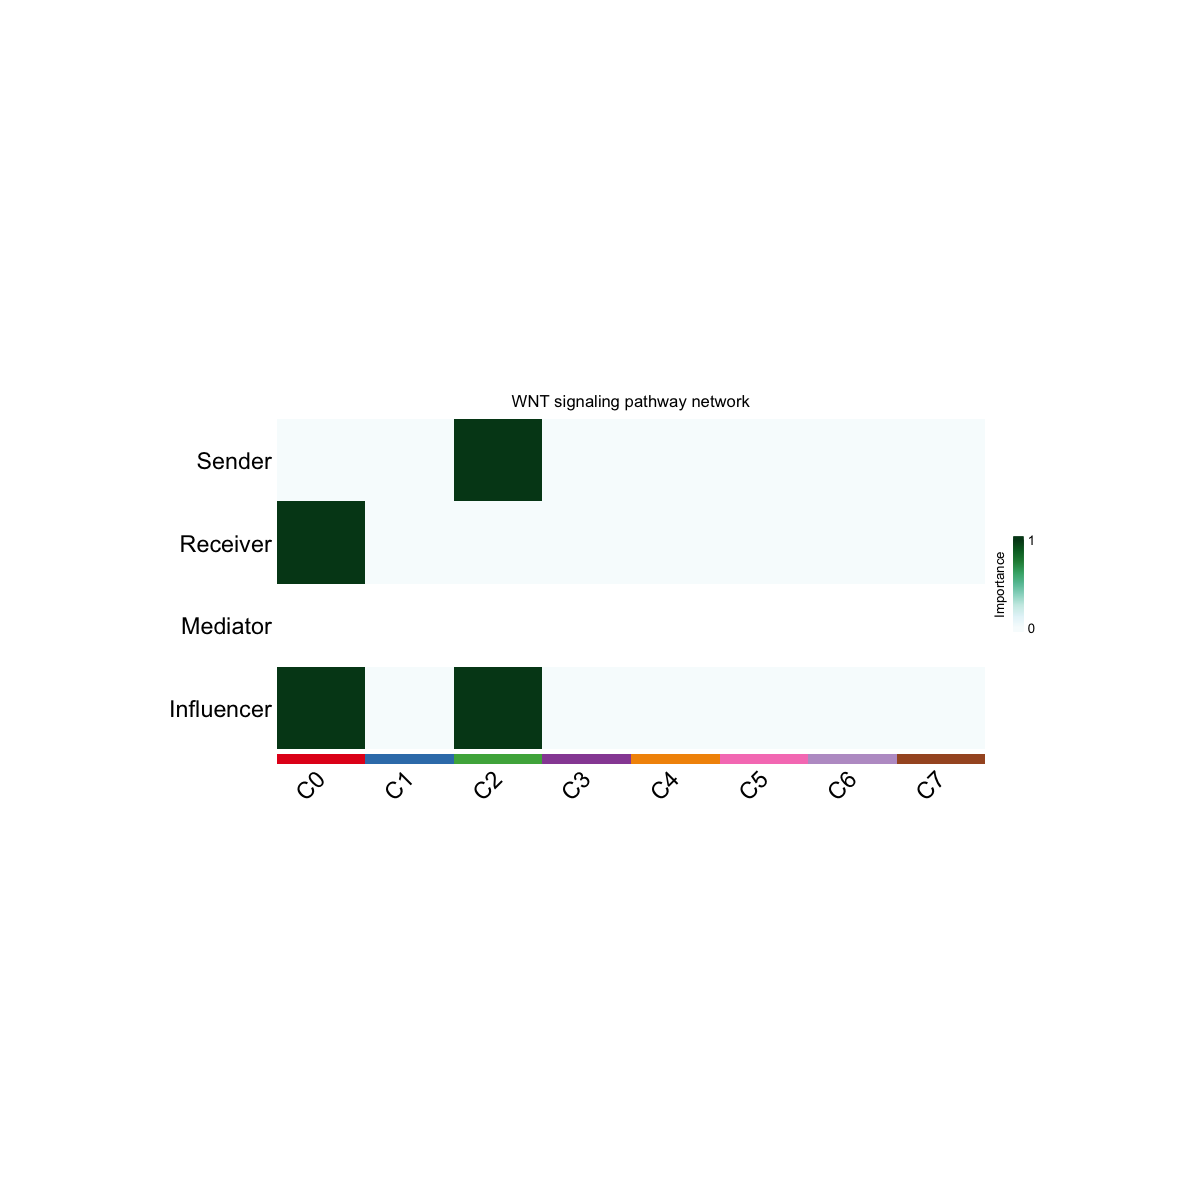

In [116]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("WNT"),
  width = 15,
  height = 7,
  font.size = 14
)

In [117]:
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, 
                                        width = 15,
                                        height = 12,
                                        font.size = 14,
                                        pattern = "outgoing")
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, 
                                        width = 15,
                                        height = 12,
                                        font.size = 14,
                                        pattern = "incoming")

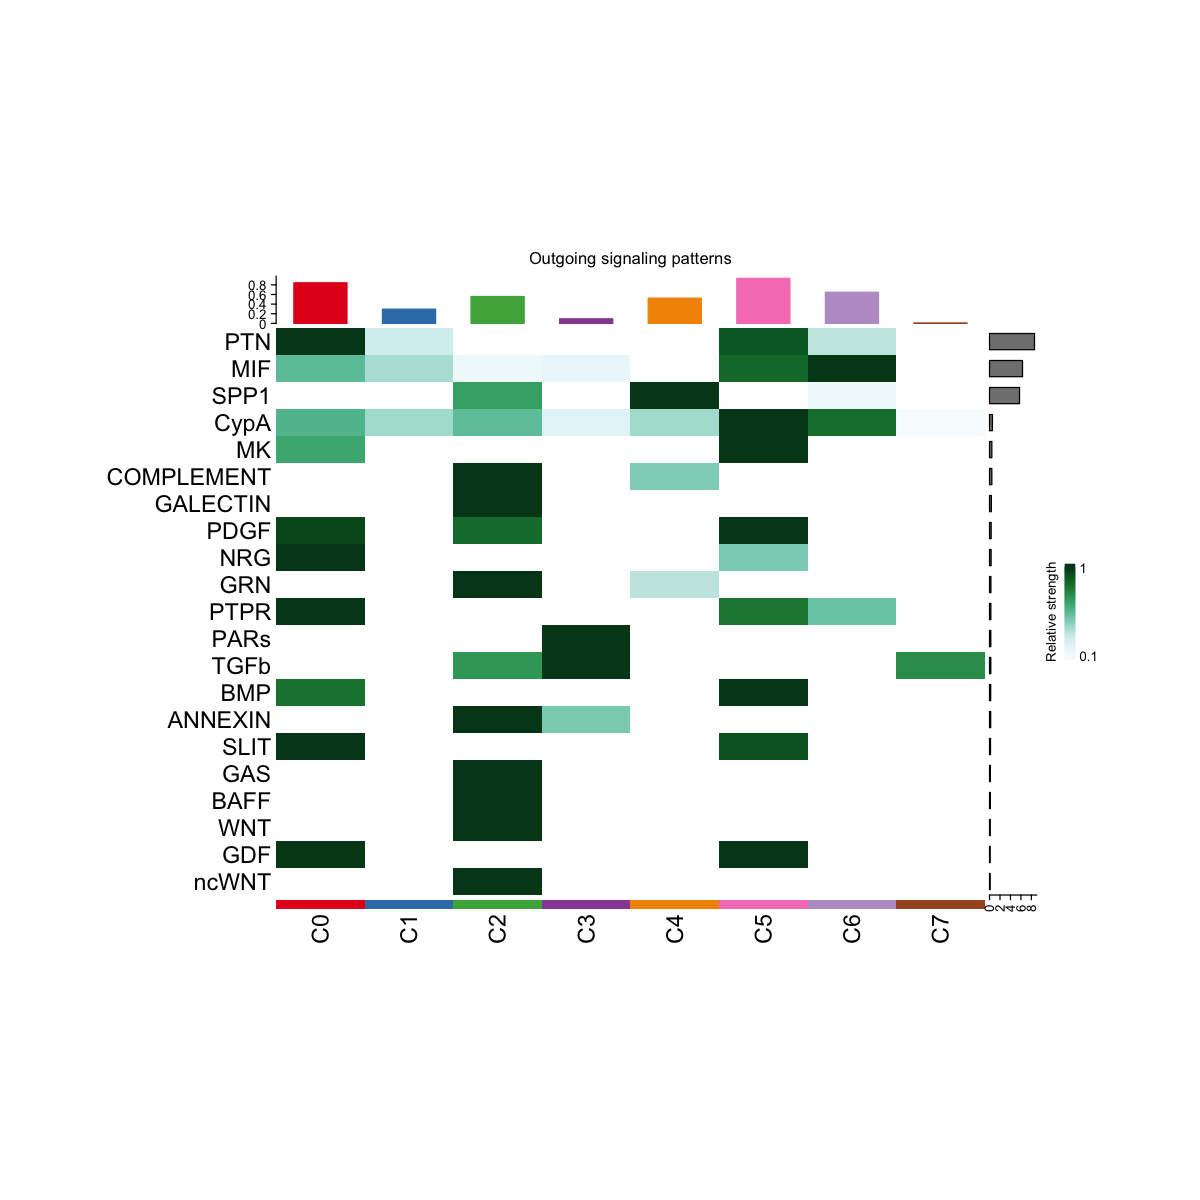

In [118]:
ht1

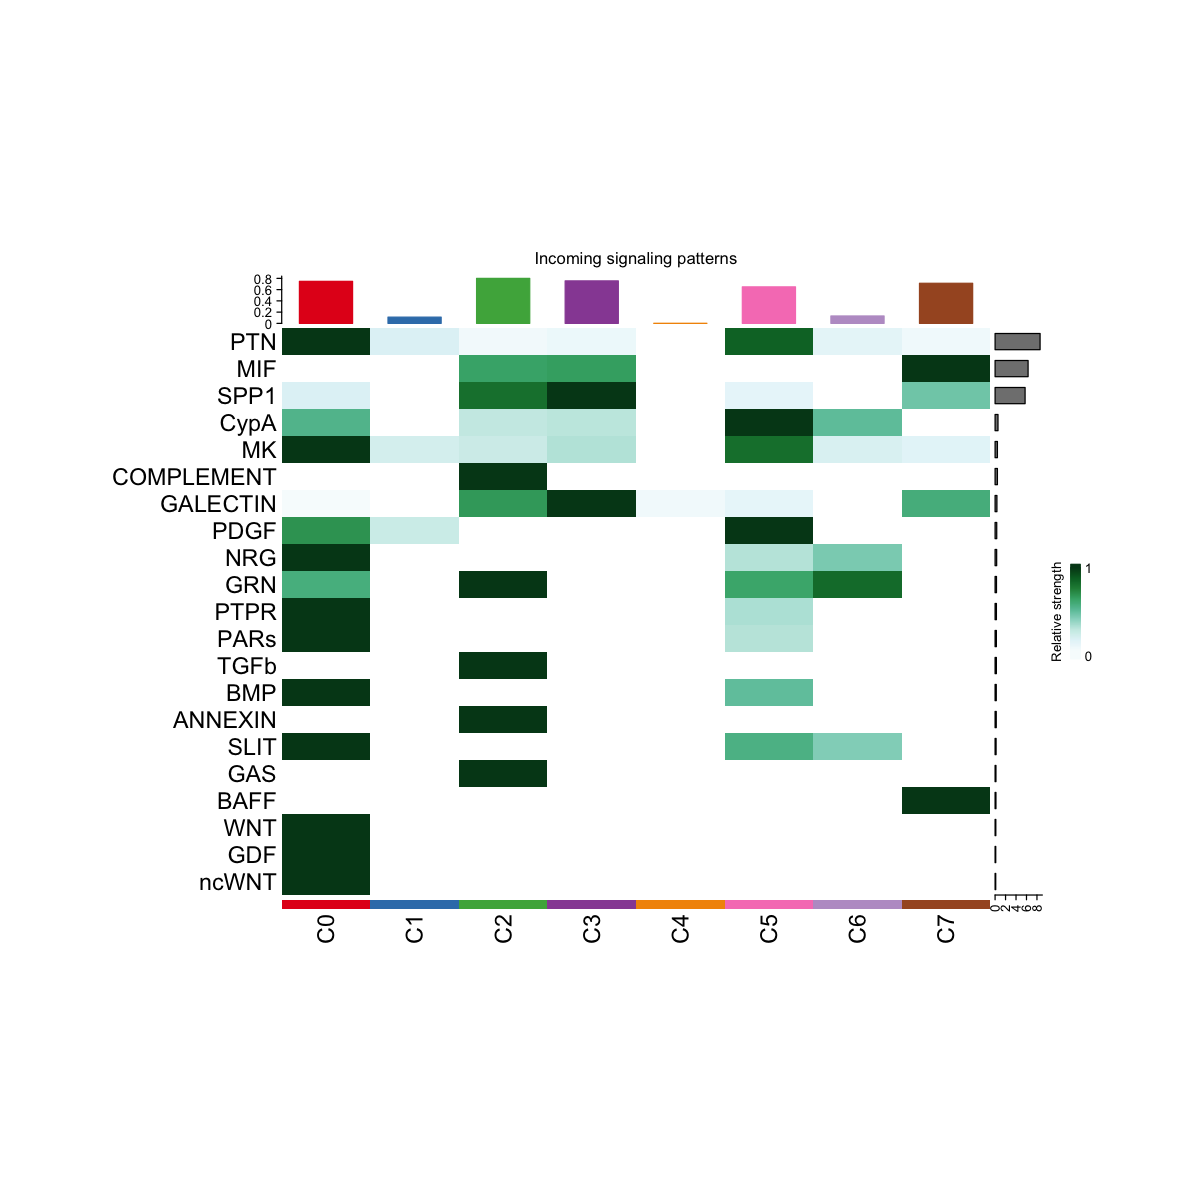

In [119]:
ht2

In [123]:
install.packages("cli")


The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmpDe8Ofi/downloaded_packages


In [124]:
selectK(cellchat, pattern = "outgoing")

ERROR: Error in base::nchar(wide_chars$test, type = "width"): lazy-load database '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/cli/R/sysdata.rdb' is corrupt


In [ ]:
options(repr.plot.wdith=20, repr.plot.height=10)
nPatterns <- 5
cellchat <- identifyCommunicationPatterns(
  cellchat,
  width=15,
  height=12,
  font.size = 14,
  pattern = "outgoing",
  k = nPatterns
)

In [84]:
library(ggalluvial)

In [ ]:

netAnalysis_river(cellchat, 
                pattern = "outgoing",
                font.size = 5)

In [ ]:
selectK(cellchat, pattern = "incoming")

In [ ]:
options(repr.plot.wdith=20, repr.plot.height=10)
nPatterns <- 5
cellchat <- identifyCommunicationPatterns(
  cellchat,
  width=15,
  height=12,
  font.size = 14,
  pattern = "incoming",
  k = nPatterns
)

In [ ]:

netAnalysis_river(cellchat, 
                pattern = "incoming",
                font.size = 5)

### Manifold and classification learning analysis of signaling networks

In [ ]:
cellchat <- computeNetSimilarity(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
cellchat <- netClustering(cellchat, type = "functional", k = 4)

In [ ]:
netVisual_embedding(cellchat, type = "functional", label.size = 3.5)

### Identify signaling groups based on structure similarity

In [ ]:
cellchat <- computeNetSimilarity(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
cellchat <- netClustering(cellchat, type = "structural", k = 4)

In [ ]:
netVisual_embedding(cellchat, type = "structural", label.size = 3.5)

In [ ]:

netVisual_embeddingZoomIn(cellchat, type = "structural", nCol = 2)

In [ ]:

saveRDS(file = "out/cellchat_p2.rds", cellchat)